## Machine Learning - Session 4 -  Data Exploration and Data Manipulation

## Part 1 - Data Exploration

In [1]:
# Set the working directory
import os
os.chdir("C:\\Users\\Gourab\\Desktop\\R")

#Read the cars.csv data
import pandas as pd
cars = pd.read_csv("cars.csv")

#### 1. Summaries and Aggregates

In [ ]:
#A. The describe() method
cars.describe()

In [ ]:
cars[["MPG","Weight"]].describe()

In [ ]:
#A. Aggregates - groupby() method
cars["Weight"].mean()

In [ ]:
cars[["Weight","Origin"]].groupby(["Origin"]).mean()

In [ ]:
cars[["Weight","Cylinders"]].groupby(["Cylinders"]).median()

In [ ]:
cars[["Weight","Origin"]].groupby(["Origin"]).describe()

#### 2. Tables (Crosstabs)

In [ ]:
#A. Univariate Frequency distribution of a categorical variable (say, Origin)
tab = pd.crosstab(cars.Origin, columns="counts")
tab

In [ ]:
list(tab)

In [ ]:
type(tab)

In [ ]:
tab.sum()

In [ ]:
#B. Univariate table of proportion
tab/tab.sum()*100

In [ ]:
#B. Univariate table of proportion
round(tab/tab.sum()*100,2)

In [ ]:
#C. Bi-variate Frequency Distribution Table
pd.crosstab(cars.Origin,columns=cars.Cylinders)

In [ ]:
#Re-Naming the Rows and Columns
table = pd.crosstab(cars.Origin, columns=cars.Cylinders)
table.columns = ["Cyl3","Cyl4","Cyl5","Cyl6","Cyl8"]
table.index = ["EU","JP","US"]
table

In [ ]:
table = pd.crosstab(cars.Origin, columns=cars.Cylinders)
table.columns
table.index

In [ ]:
#Finding the col-sums
coltotal = table.sum(axis=0)
coltotal

In [ ]:
#Finding the row sums
rowtotal = table.sum(axis=1)
rowtotal

In [ ]:
#D. Table of joint proportion
round(table/sum(rowtotal),2)*100

In [ ]:
#OR
table/sum(coltotal)

In [ ]:
#E. Table of conditional proportion (Conditioned on rows) [P(Cyl|Origin)]
#--> Out of all the cars originated in [o], [q]% of the cars have [x] cylinders.
table.div(rowtotal, axis=0) #(Why?)

In [ ]:
#F. Table of conditional proportion (conditioned on columns) [P(Origin|Cyl)]
#--> Out of all the cars having [x] cylinders, [p]% of them originate in [Origin]
table.div(coltotal, axis=1)

#### 3. Graphs

In [2]:
import matplotlib.pyplot as plt

#### 3A. Histograms

In [ ]:
#histogram of MPG
cars.hist(column="MPG")
plt.show()

In [ ]:
#Additional arguments: 
cars.hist(column="MPG", 
          grid=False,         #Do not include the grid
          figsize = (6,4),    #(length ,  height) of the plot in inches
         bins=10)    

plt.show()

*Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html*

In [ ]:
#Labelling the axes and giving the title
cars.hist(column="MPG", 
          grid=False,         #Do not include the grid
          figsize = (6,4))    #(length ,  height) of the plot in inches

plt.xlabel("Miles per Gallon", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)
plt.title("Histogram of MPG", fontsize=16)


plt.show()

In [ ]:
#Editing color and edgecolor
cars.hist(column="MPG", 
          grid=False,         
          figsize = (6,4),
          color = "lightgreen",
          edgecolor = "white")  

plt.xlabel("Miles per Gallon", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)
plt.title("Histogram of MPG", fontsize=16)


plt.show()

In [ ]:
#Breaking up by the categories of a categorical variable
cars.hist(column="MPG", 
          by = "Origin",           #Note this argument
          grid=False,         
          figsize = (8,6),
          color = "lightgreen",
          edgecolor = "white")  

plt.xlabel("Miles per Gallon", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)
plt.title("Histogram of MPG", fontsize=16)


plt.show()

#### 3B. Boxplots

In [ ]:
#Plotting a boxplot for the variable MPG
cars.boxplot(column="MPG")
plt.show()

In [ ]:
#Additional arguments (horizontal boxplot)
cars.boxplot(column="MPG", 
             grid=False,         
             figsize = (6,4),
             vert = False)    #To plot a horizontal boxplot

plt.show()

*Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html*

In [ ]:
#Labelling the boxplot
cars.boxplot(column="MPG", notch=True, #To get the notch
             grid=False,         
             figsize = (8,6),
             vert = False)    #To plot a horizontal boxplot

plt.xlabel("Miles per Gallon", fontsize=12)
plt.title("Boxplot of MPG", fontsize=14)

plt.show()

In [ ]:
#Side by Side boxplot
cars.boxplot(column="Weight", notch = True,
             by="Origin",
             grid=False,         
             figsize = (6,4))

plt.ylabel("Weight of Car", fontsize=12)
plt.title("Boxplot of Weight", fontsize=14)

plt.show()

In [ ]:
#The rotation argument
#Side by Side boxplot
cars.boxplot(column="Weight", 
             by="Origin",
             grid=False,         
             figsize = (6,4),
             rot=90)            #The angle by which you want to rotate the labels

plt.xlabel("Miles per Gallon", fontsize=12)
plt.title("Boxplot of MPG", fontsize=14)

plt.show()


#### 3C. Bar Plots

In [3]:
cars['Origin'].value_counts()

US        254
Japan      79
Europe     73
Name: Origin, dtype: int64

In [4]:
type(cars['Origin'].value_counts())

pandas.core.series.Series

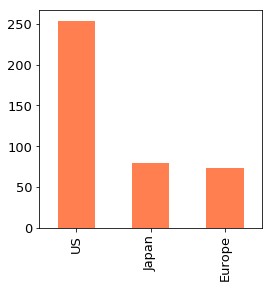

In [5]:
cars['Origin'].value_counts().plot(kind='bar', figsize=(4,4),
                                        color="coral", fontsize=13)

plt.show()

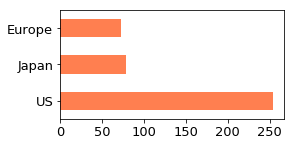

In [6]:
cars.Origin.value_counts().plot(kind='barh', figsize=(4,2),
                                        color="coral", fontsize=13)

plt.show()

Study pandas.DataFrame.plot: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html 

#### 3D. Scatter Plots

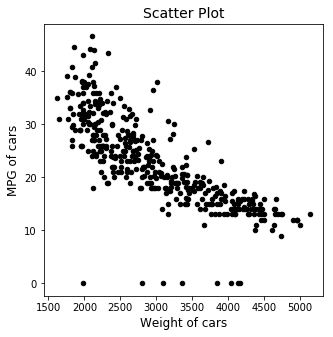

In [7]:
#Scatter plot 
cars.plot(kind="scatter",           #The type of plot to be plotted
          x="Weight",y="MPG",       #The variables in x and y axis
          color="black",            #Colour of the dots
          figsize=(5,5))            #Figure size


plt.xlabel("Weight of cars", fontsize=12)
plt.ylabel("MPG of cars", fontsize=12)
plt.title("Scatter Plot", fontsize=14)

plt.show()

*Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html*

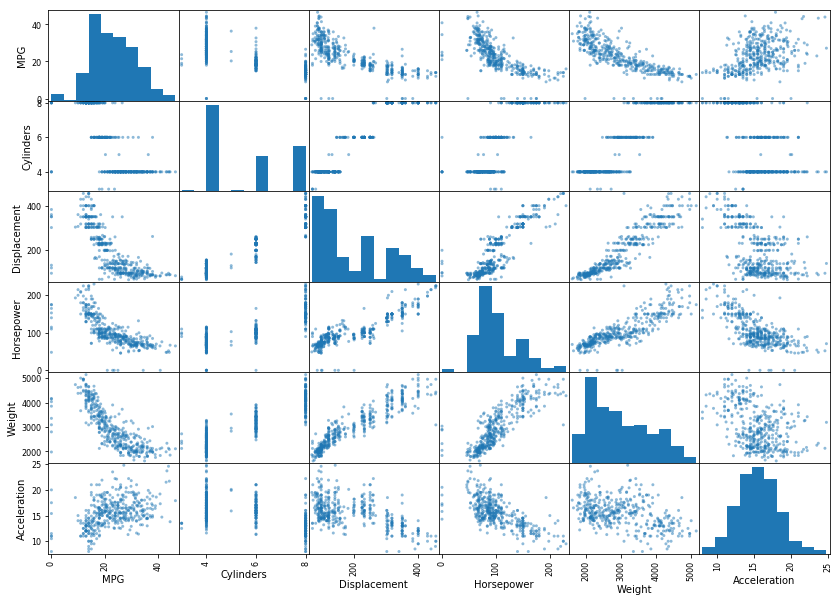

In [9]:
#Pairwise Scatterplot
from pandas.plotting import scatter_matrix
scatter_matrix(cars.drop(["Car","Model","Origin"],axis=1), alpha=0.5, figsize=(14, 10), 
               diagonal='hist')
plt.show()


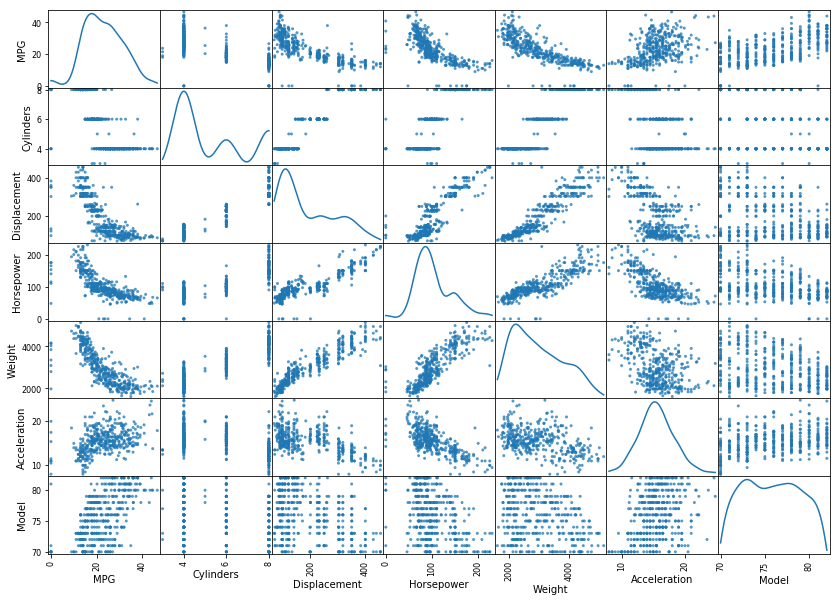

In [11]:
#Exporting Graph

from pandas.plotting import scatter_matrix
scatter_matrix(cars.drop(["Car","Origin"],axis=1), alpha=0.75, figsize=(14, 10), diagonal='kde')
plt.savefig('scatter.png')

## Part 2 - Data Manipulation

#### 1. Sorting

In [ ]:
car

In [12]:
#Sort the data in ascending order of MPG
cars.sort_values("MPG").head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
13,Plymouth Satellite (sw),0.0,8,383.0,175,4166,10.5,70,US
367,Saab 900s,0.0,4,121.0,110,2800,15.4,81,Europe
17,Ford Mustang Boss 302,0.0,8,302.0,140,3353,8.0,70,US
39,Volkswagen Super Beetle 117,0.0,4,97.0,48,1978,20.0,71,Europe
10,Citroen DS-21 Pallas,0.0,4,133.0,115,3090,17.5,70,Europe


In [ ]:
#Sort the data in descending order of MPG
cars.sort_values("MPG", ascending=0).head()

In [ ]:
#Sort the data in descending order of Origin and then by increasing order of MPG
cars.sort_values(["Origin","MPG"], ascending=[0,1])

In [14]:
#Saving in another data frame
cars2 = cars.sort_values(["Origin","MPG"], ascending=[0,1])
cars2

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
11,Chevrolet Chevelle Concours (sw),0.0,8,350.0,165,4142,11.5,70,US
12,Ford Torino (sw),0.0,8,351.0,153,4034,11.0,70,US
13,Plymouth Satellite (sw),0.0,8,383.0,175,4166,10.5,70,US
14,AMC Rebel SST (sw),0.0,8,360.0,175,3850,11.0,70,US
17,Ford Mustang Boss 302,0.0,8,302.0,140,3353,8.0,70,US
34,Hi 1200D,9.0,8,304.0,193,4732,18.5,70,US
31,Ford F250,10.0,8,360.0,215,4615,14.0,70,US
32,Chevy C20,10.0,8,307.0,200,4376,15.0,70,US
33,Dodge D200,11.0,8,318.0,210,4382,13.5,70,US
74,Mercury Marquis,11.0,8,429.0,208,4633,11.0,72,US


In [ ]:
#Exporting Data


#### 2. Variable Transformation

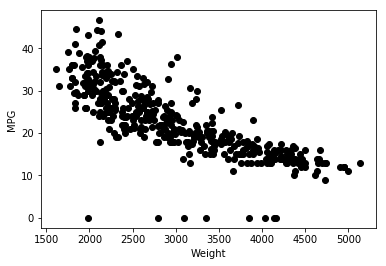

In [15]:
# Plot a scatter plot between MPG and weight. Comment of the linearity.
plt.scatter(cars.Weight, y=cars.MPG, color="black")
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.show()

C:\Users\Gourab\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


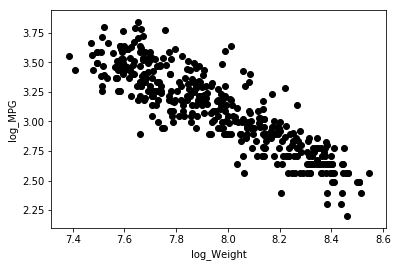

In [16]:
# Re-plot the scatter plot by taking the log transformation of both the variables. Does the linearity 
# Improve?
import numpy as np

plt.scatter(np.log(cars.Weight), y=np.log(cars.MPG), color="black")
plt.xlabel("log_Weight")
plt.ylabel("log_MPG")
plt.show()

In [17]:
np.log(cars.MPG).describe()

C:\Users\Gourab\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


count    406.000000
mean           -inf
std             NaN
min            -inf
25%        2.833213
50%        3.106824
75%        3.367296
max        3.841601
Name: MPG, dtype: float64

In [18]:
# But there is a problem! Check the summary of log(MPG). What do you observe?
cars.MPG.describe()

count    406.000000
mean      23.051232
std        8.401777
min        0.000000
25%       17.000000
50%       22.350000
75%       29.000000
max       46.600000
Name: MPG, dtype: float64

In [ ]:
np.log(cars.MPG).describe()

In [19]:
# Can you identify where we got misleaded? Probably the answer lies in the summary of MPG.
# How can we correct this?
np.log(cars.MPG+1).describe()

count    406.000000
mean       3.085804
std        0.543030
min        0.000000
25%        2.890372
50%        3.150595
75%        3.401197
max        3.862833
Name: MPG, dtype: float64

In [ ]:
# Study the association between MPG and Horsepower. (Do Yourself)



#### The np.where() function


In [ ]:
import numpy as np

In [21]:
# PROBLEM 1:
# Create a variable HP which will take only two values:
# IF Horsepower < 100 THEN "Low HP"
# IF Horsepower >= 100 THEN "High HP"

#np.where(condition, value if true, value if fase)

cars["HP"] = np.where(cars.Horsepower >= 100, "High", "Low")
cars.tail(10)

ValueError: either both or neither of x and y should be given

In [ ]:
#np.where(condition1, value if true, condition 2, value if true, condition 3, value if true, value if flase)

In [ ]:
#PROBLEM 2:
# Create a Variable MPG_Rate which will take on the values as follows:
# IF MPG < 15 THEN "Normal"
# IF MPG >= 15 AND MPG <=25 THEN "GOOD"
# IF MPG >= 25 AND MPG <=35 THEN "GREAT"
# IF MPG >= 35 THEN "AWESOME"


